# APS 4

Funções padrões

In [211]:
from funcoesTermosol import plota, importa, geraSaida

In [212]:
import math
import numpy as np

A funcao 'importa' retorna o numero de nos [nn], a matriz dos nos [N], o numero
de membros [nm], a matriz de incidencia [Inc], o numero de cargas [nc], o vetor
carregamento [F], o numero de restricoes [nr] e o vetor de restricoes [R] 
contidos no arquivo de entrada.

In [213]:
[nn,N,nm,Inc,nc,F,nr,R] = importa('entrada.xls')

In [214]:
print([nn,nm,nc,nr])

[3, 3, 2, 3]


In [215]:
Inc

array([[1.0e+00, 2.0e+00, 2.1e+11, 2.0e-04],
       [2.0e+00, 3.0e+00, 2.1e+11, 2.0e-04],
       [3.0e+00, 1.0e+00, 2.1e+11, 2.0e-04]])

In [216]:
R

array([[0.],
       [2.],
       [3.]])

In [217]:
F

array([[   0.],
       [   0.],
       [   0.],
       [   0.],
       [ 150.],
       [-100.]])

In [218]:
N

array([[0. , 0. , 0.3],
       [0. , 0.4, 0.4]])

In [219]:
N.shape

(2, 3)

### Função para calcular distâncias, cossenos e senos

In [220]:
def calc_dist_cs(N, Inc):
    l_list = []
    c_list = []
    s_list = []
    for i in range(N.shape[1]):
        if i == N.shape[1]-1:
            l = (math.sqrt((N[0][i] - N[0][0])**2 + (N[1][i] - N[1][0])**2))
            c = (N[0][0]-N[0][i])/l
            s = (N[1][0]-N[1][i])/l
            l_list.append(l)
            c_list.append(c)
            s_list.append(s)
        else:
            l = (math.sqrt((N[0][i] - N[0][i+1])**2 + (N[1][i] - N[1][i+1])**2))
            c = (N[0][i+1]-N[0][i])/l
            s = (N[1][i+1]-N[1][i])/l
            l_list.append(l)
            c_list.append(c)
            s_list.append(s)
    l_array = np.c_[l_list]
    c_array = np.c_[c_list]
    s_array = np.c_[s_list]
    Inc = np.hstack((Inc, l_array))
    Inc = np.hstack((Inc, c_array))
    Inc = np.hstack((Inc, s_array))
    return Inc

ex:

In [221]:
Inc = calc_dist_cs(N,Inc)
Inc

array([[ 1.0e+00,  2.0e+00,  2.1e+11,  2.0e-04,  4.0e-01,  0.0e+00,
         1.0e+00],
       [ 2.0e+00,  3.0e+00,  2.1e+11,  2.0e-04,  3.0e-01,  1.0e+00,
         0.0e+00],
       [ 3.0e+00,  1.0e+00,  2.1e+11,  2.0e-04,  5.0e-01, -6.0e-01,
        -8.0e-01]])

### Função para achar matrizes de rigidez

In [222]:
def matrizes_rigidez(Inc, nm):
    matrizes = np.zeros(shape=(nm,4,4))   # Considerando a treliça com duas extremidades
    matrizes_coordenada = np.zeros(shape=(nm,4,4,2))   # Considerando as coordenadas alinhadas com os graus de liberdade
    
    i = 0
    for cs in Inc:
        rigidez = cs[2]*cs[3]/cs[4]  # E*A/L para todos os membros
        
        c = cs[5]
        s = cs[6]
        matriz_cs = [[c**2 ,     c*s,   -(c**2), -(c*s) ],
                     [c*s ,      s**2,  -(c*s),  -(s**2)],
                     [-(c**2),  -(c*s),  c**2,    c *s  ],
                     [-(c*s),   -(s**2), c*s,     s**2  ]]
       


        matriz_coord = np.zeros(shape=(4,4,2))

        grau_linha = 0
        grau_coluna = 0
        for m in range(4):
            if   m == 0:
                grau_linha = cs[0]*2-1
            elif m == 1:
                grau_linha = cs[0]*2 
            elif m == 2:
                grau_linha = cs[1]*2-1 
            elif m == 3:
                grau_linha = cs[1]*2 
                
            for n in range(4):
                if   n == 0:
                    grau_coluna = cs[0]*2-1
                elif n == 1:
                    grau_coluna = cs[0]*2
                elif n == 2:
                    grau_coluna = cs[1]*2-1
                elif n == 3:
                    grau_coluna = cs[1]*2

                matriz_coord[m][n] = (grau_linha-1, grau_coluna-1)
       
        
        matriz_cs = np.multiply(matriz_cs, rigidez)
        
        matrizes_coordenada[i,:,:,:] = matriz_coord[:,:,:]
        matrizes[i,:,:] = np.add(matrizes[i,:,:], matriz_cs)

        i+=1
       
    return matrizes, matrizes_coordenada


ex

In [223]:
a,b= matrizes_rigidez(Inc,nm)
a

array([[[ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
        [ 0.000e+00,  1.050e+08,  0.000e+00, -1.050e+08],
        [ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
        [ 0.000e+00, -1.050e+08,  0.000e+00,  1.050e+08]],

       [[ 1.400e+08,  0.000e+00, -1.400e+08,  0.000e+00],
        [ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
        [-1.400e+08,  0.000e+00,  1.400e+08,  0.000e+00],
        [ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00]],

       [[ 3.024e+07,  4.032e+07, -3.024e+07, -4.032e+07],
        [ 4.032e+07,  5.376e+07, -4.032e+07, -5.376e+07],
        [-3.024e+07, -4.032e+07,  3.024e+07,  4.032e+07],
        [-4.032e+07, -5.376e+07,  4.032e+07,  5.376e+07]]])

In [224]:
b

array([[[[0., 0.],
         [0., 1.],
         [0., 2.],
         [0., 3.]],

        [[1., 0.],
         [1., 1.],
         [1., 2.],
         [1., 3.]],

        [[2., 0.],
         [2., 1.],
         [2., 2.],
         [2., 3.]],

        [[3., 0.],
         [3., 1.],
         [3., 2.],
         [3., 3.]]],


       [[[2., 2.],
         [2., 3.],
         [2., 4.],
         [2., 5.]],

        [[3., 2.],
         [3., 3.],
         [3., 4.],
         [3., 5.]],

        [[4., 2.],
         [4., 3.],
         [4., 4.],
         [4., 5.]],

        [[5., 2.],
         [5., 3.],
         [5., 4.],
         [5., 5.]]],


       [[[4., 4.],
         [4., 5.],
         [4., 0.],
         [4., 1.]],

        [[5., 4.],
         [5., 5.],
         [5., 0.],
         [5., 1.]],

        [[0., 4.],
         [0., 5.],
         [0., 0.],
         [0., 1.]],

        [[1., 4.],
         [1., 5.],
         [1., 0.],
         [1., 1.]]]])

### Função para matriz de rigidez global

In [225]:
def rigidez_global(matrizes_rigidez, matrizes_coordenadas):
    matriz_global = np.zeros(shape=(nn*2,nn*2))   # Considerando 2 graus de liberdade~
    elemento = 0 
    pos_lin = 0
    pos_col = 0
    for matriz_coordenada in matrizes_coordenadas:
        for linha in matriz_coordenada:
            for coordenada in linha:
                matriz_global[int(coordenada[0])][int(coordenada[1])] += matrizes_rigidez[elemento][pos_lin][pos_col]
                pos_col += 1
            pos_col = 0
            pos_lin += 1
        pos_lin = 0
        elemento += 1
        

    return matriz_global


ex

In [226]:
mat_global = rigidez_global(a, b)
mat_global

array([[ 3.0240e+07,  4.0320e+07,  0.0000e+00,  0.0000e+00, -3.0240e+07,
        -4.0320e+07],
       [ 4.0320e+07,  1.5876e+08,  0.0000e+00, -1.0500e+08, -4.0320e+07,
        -5.3760e+07],
       [ 0.0000e+00,  0.0000e+00,  1.4000e+08,  0.0000e+00, -1.4000e+08,
         0.0000e+00],
       [ 0.0000e+00, -1.0500e+08,  0.0000e+00,  1.0500e+08,  0.0000e+00,
         0.0000e+00],
       [-3.0240e+07, -4.0320e+07, -1.4000e+08,  0.0000e+00,  1.7024e+08,
         4.0320e+07],
       [-4.0320e+07, -5.3760e+07,  0.0000e+00,  0.0000e+00,  4.0320e+07,
         5.3760e+07]])

### Condições de contorno

In [227]:
def contorno(mat_global, R, F):
   contorno_lista = []
   for linha in R:
      for indice in linha:
         contorno_lista.append(int(indice))

   matriz_contorno = np.delete(mat_global, contorno_lista, 0)
   matriz_contorno = np.delete(matriz_contorno, contorno_lista, 1)
   matriz_forca_contorno = np.delete(F, contorno_lista, 0)
   return matriz_contorno, matriz_forca_contorno, contorno_lista

ex

In [228]:
global_contorno, forca_contorno, restricoes = contorno(mat_global, R, F)
global_contorno

array([[ 1.5876e+08, -4.0320e+07, -5.3760e+07],
       [-4.0320e+07,  1.7024e+08,  4.0320e+07],
       [-5.3760e+07,  4.0320e+07,  5.3760e+07]])

In [229]:
forca_contorno

array([[   0.],
       [ 150.],
       [-100.]])

In [230]:
restricoes

[0, 2, 3]

### Resolvendo a matriz depois das condições de contorno (achar deslocamentos)

Aplicando Gauss-Seidel

In [231]:
def Gauss_Seidel(a, b):
    x = np.zeros(len(a[0]))
    erro = 10000
    y = np.zeros(len(a[0]))
    n = 0
    while(erro > 10):
        i = 0
        while(i < len(y)):
            j = 0
            sup = 0
            while(j < 3):
                sup -= a[i][j]*y[j]
                j += 1
            sup += a[i][i]*y[i]
            y[i] = (b[i]+sup)/a[i][i]
            i += 1
        
        f = 0
        for g in y:
            if g == 0:
                erro += abs((g - x[f]))
            else:
                erro += abs((g - x[f])/i)
            f += 1    
        erro = erro/f
        x = y.copy()
    return x

ex

In [232]:
deslocamentos = Gauss_Seidel(global_contorno, forca_contorno)
deslocamentos

array([-9.50945067e-07,  1.60575208e-06, -4.01537818e-06])

### Matriz de deslocamentos

In [233]:
def resultado_deslocamentos(deslocamentos, restricoes):
    matriz_desolcamentos = np.zeros(shape=(nn*2, 1))
    i_deslocamento = 0
    linha_matriz = 0
    
    for elemento in matriz_desolcamentos[:,0]:
        if linha_matriz not in restricoes:
            matriz_desolcamentos[linha_matriz][0] = deslocamentos[i_deslocamento]
            i_deslocamento += 1
        linha_matriz += 1

    return matriz_desolcamentos
        

ex

In [234]:
matriz_desolcamentos = resultado_deslocamentos(deslocamentos, restricoes)
matriz_desolcamentos

array([[ 0.00000000e+00],
       [-9.50945067e-07],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 1.60575208e-06],
       [-4.01537818e-06]])

### Reações de apoio

In [235]:
def resultado_forcas(matriz_global, matriz_desolcamentos, restricoes):
    matriz_forcas = np.matmul(matriz_global, matriz_desolcamentos)
    deletar = []
    for i in range(matriz_forcas.shape[0]):
        if i not in restricoes:
            deletar.append(i)
    
    matriz_forcas = np.delete(matriz_forcas, deletar, 0)
    return matriz_forcas

In [236]:
apoios = resultado_forcas(mat_global, matriz_desolcamentos, restricoes)
apoios

array([[  75.        ],
       [-224.80529141],
       [  99.84923205]])

### Deformações

In [237]:
def resultado_deformacao(Inc, matriz_deslocamento, nm):

    matriz_deformacao = np.zeros(shape=(nm,1))
    i = 0
    for elemento in Inc:
        c = elemento[5]
        s = elemento[6]
        l = elemento[4]
        no1 = int(elemento[0])
        no2 = int(elemento[1])
        mat_cs = [-c, -s, c, s]
        mat_desloc =[[matriz_deslocamento[no1*2-2][0]],
                     [matriz_deslocamento[no1*2-1][0]],
                     [matriz_deslocamento[no2*2-2][0]],
                     [matriz_deslocamento[no2*2-1][0]]]
        #print(mat_desloc)
        resultado_mult = np.matmul(mat_cs, mat_desloc)
        deformacao = np.multiply(resultado_mult, 1/l)
        matriz_deformacao[i][0] = deformacao[0]
        i+=1
    return matriz_deformacao

        

ex

In [238]:
matriz_deformacao = resultado_deformacao(Inc, matriz_desolcamentos, nm)
matriz_deformacao

array([[ 2.37736267e-06],
       [ 5.35250694e-06],
       [-2.97619048e-06]])

### Tensões internas

In [239]:
def resultado_tensao(Inc, mat_deformacao):
    mat_tensao = mat_deformacao.copy()
    i = 0
    for elemento in Inc: 
        mat_tensao[i][0] = mat_deformacao[i][0]*elemento[2]
        i+=1
    return mat_tensao

In [240]:
tensoes = resultado_tensao(Inc, matriz_deformacao)
tensoes

array([[ 499246.16026889],
       [1124026.4570419 ],
       [-625000.        ]])

### Forças internas

In [241]:
def resultado_forca(Inc, mat_tensao):
    mat_forca = mat_tensao.copy()
    i = 0
    for elemento in Inc: 
        mat_forca[i][0] = mat_tensao[i][0]*elemento[3]
        i+=1
    return mat_forca

ex

In [242]:
forcas = resultado_forca(Inc, tensoes)
forcas

array([[  99.84923205],
       [ 224.80529141],
       [-125.        ]])

### SAÍDA

In [243]:
#geraSaida("saida", apoios, matriz_desolcamentos,matriz_deformacao, forcas, tensoes)

### Gráficos

In [244]:
N

array([[0. , 0. , 0.3],
       [0. , 0.4, 0.4]])

In [245]:
matriz_desolcamentos

array([[ 0.00000000e+00],
       [-9.50945067e-07],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 1.60575208e-06],
       [-4.01537818e-06]])

In [246]:
def novas_coordenadas(N, matriz_deslocamentos):
    novo_N = N.copy()
    i_desloc = 0
    for eixo in novo_N:
        for valor in eixo:
            valor += matriz_deslocamentos[i_desloc][0]
            i_desloc += 2
        i_desloc = 1
    return novo_N

ex

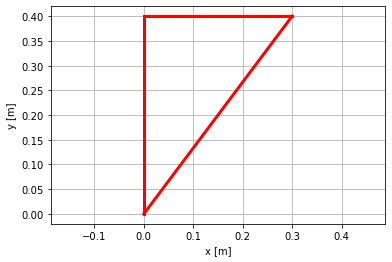

In [247]:
plota(N, Inc)

In [248]:
new_N = novas_coordenadas(N, matriz_desolcamentos)
new_N

array([[0. , 0. , 0.3],
       [0. , 0.4, 0.4]])

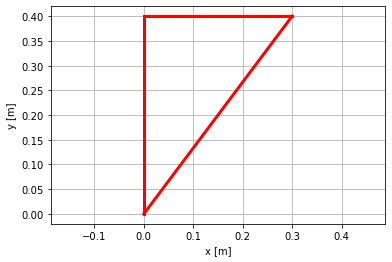

In [249]:
plota(new_N, Inc)